In [ ]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
df=pd.read_csv("tcs_data.csv")

In [ ]:
df.head()

,Date,Products,Sales
0,01-01-2013,Phone,13
1,02-01-2013,Phone,11
2,03-01-2013,Phone,14
3,04-01-2013,Phone,13
4,05-01-2013,Phone,10


In [ ]:
df.shape

(913000, 3)

In [ ]:
df.dtypes

Date        object
Products    object
Sales        int64
dtype: object

In [ ]:
df.isna().sum()

Date        0
Products    0
Sales       0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      913000 non-null  object
 1   Products  913000 non-null  object
 2   Sales     913000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 20.9+ MB


In [ ]:
df.describe()

,Sales
count,913000.000000
mean,52.250287
std,28.801144
min,0.000000
25%,30.000000
50%,47.000000
75%,70.000000
max,231.000000


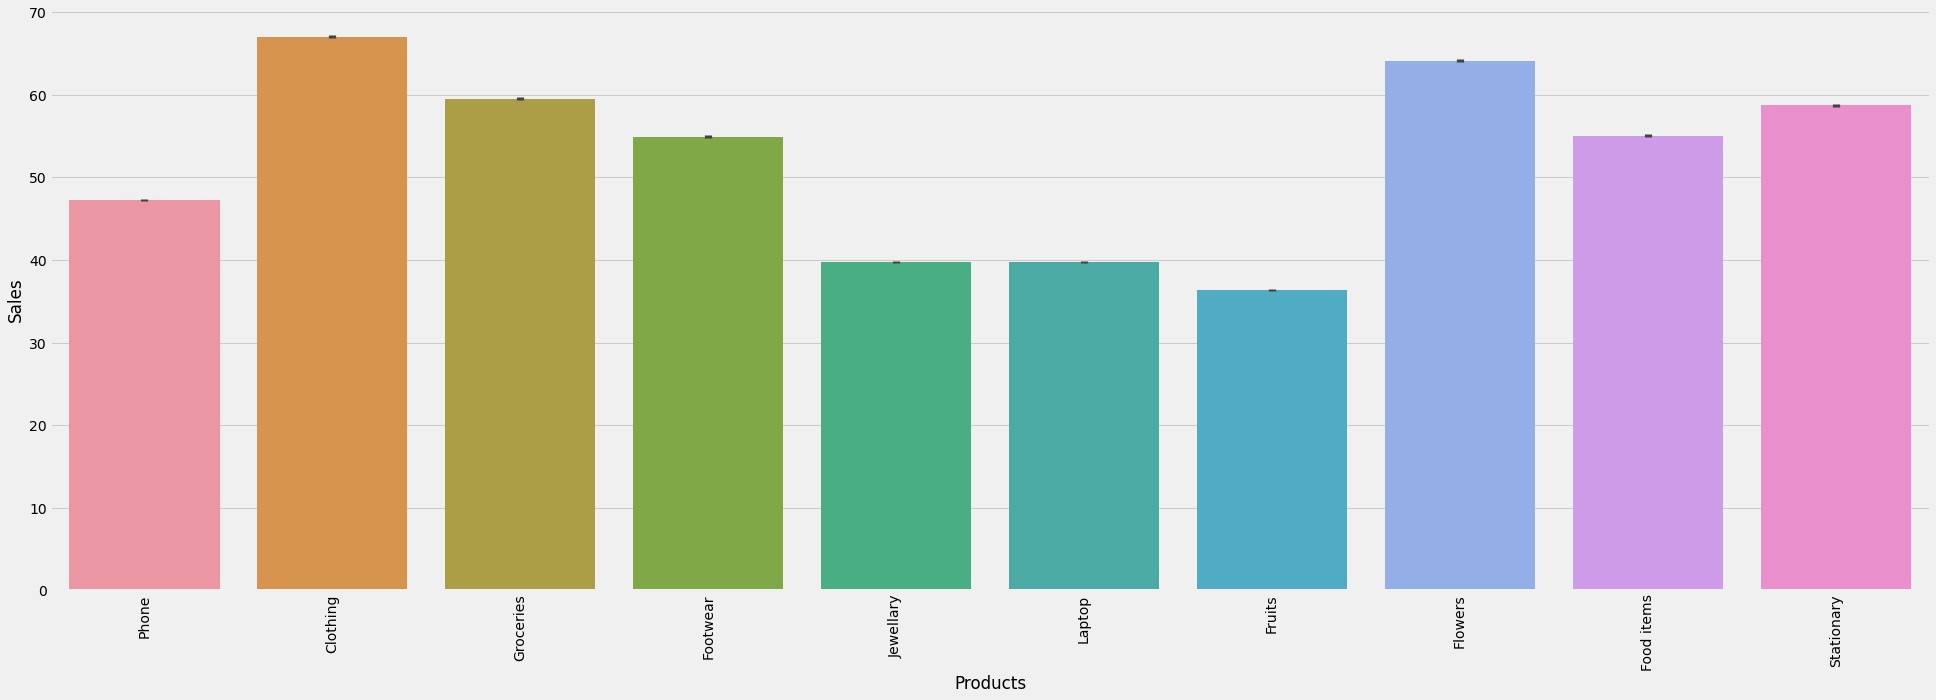

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='Products',y='Sales',data=df)

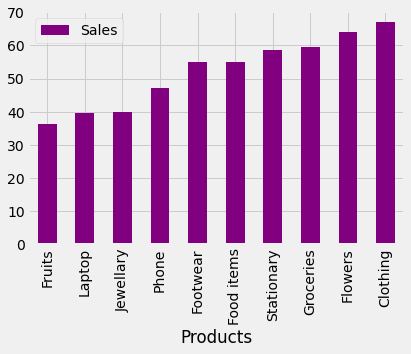

In [ ]:
df[['Sales','Products']].groupby(["Products"]).mean().sort_values(by='Sales').plot.bar(color='purple')

In [ ]:
df.groupby('Products').sum().sort_values('Sales', ascending = False)

,Sales
Products,
Clothing,6120128
Flowers,5856169
Groceries,5435144
Stationary,5360158
Food items,5025976
Footwear,5012639
Phone,4315603
Jewellary,3631016
Laptop,3627670


[]

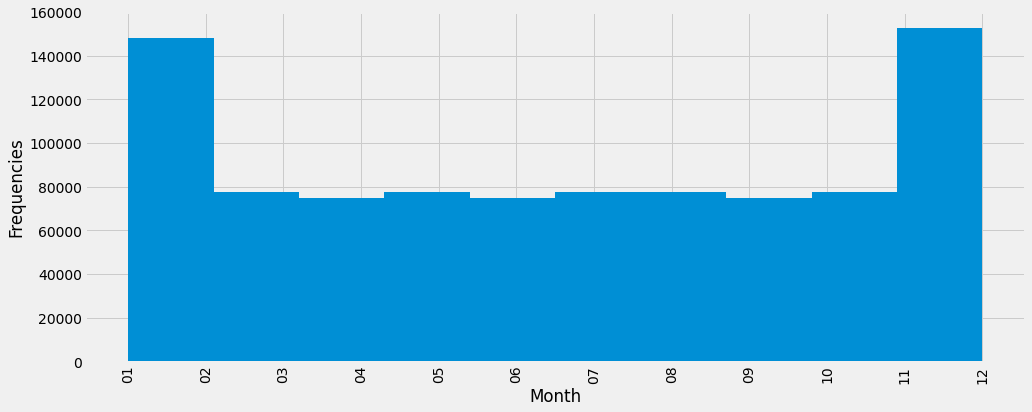

In [ ]:
df[["Day","Month","Year"]]=df['Date'].str.split("-",expand=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.Month.hist()
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Month present in the dataset.

[]

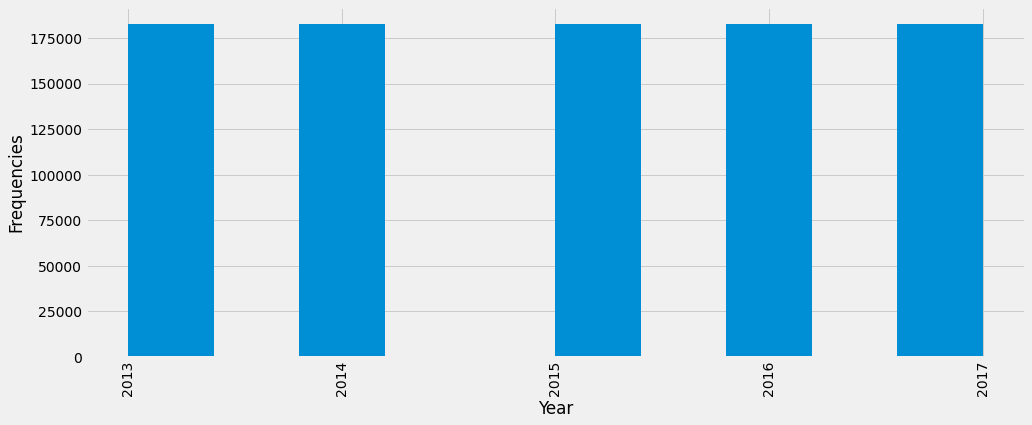

In [ ]:
df[["Day","Month","Year"]]=df['Date'].str.split("-",expand=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.Year.hist()
plt.xlabel('Year')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Year present in the dataset.

In [ ]:
# Set date field as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

In [ ]:
mdf = df.resample('M').sum()  
mdf.info()
mdf.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


,Sales
Date,
2013-01-31,536883
2013-02-28,521637
2013-03-31,643749
2013-04-30,667252
2013-05-31,720997


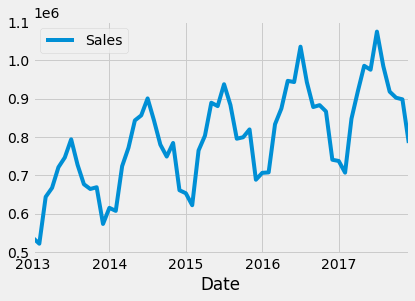

In [ ]:
mdf.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def stest(s):
    r=adfuller(s)
    l=['ADF test','p-value','#lags used','no. of observations used']
    for v,la in zip(r,l):
        print(la,'->',str(v))
    print()
    if r[1]<=0.05:
        print('data is stationary')
    else:
        print('data is not stationary')

In [ ]:
stest(mdf['Sales'])

ADF test -> -4.570251606630181
p-value -> 0.00014649839461232977
#lags used -> 11
no. of observations used -> 48

data is stationary


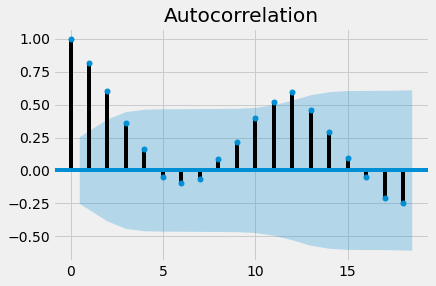

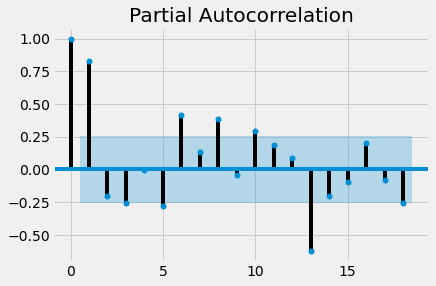

In [ ]:
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mdf)
matplotlib.pyplot.show()
plot_pacf(mdf)
matplotlib.pyplot.show()

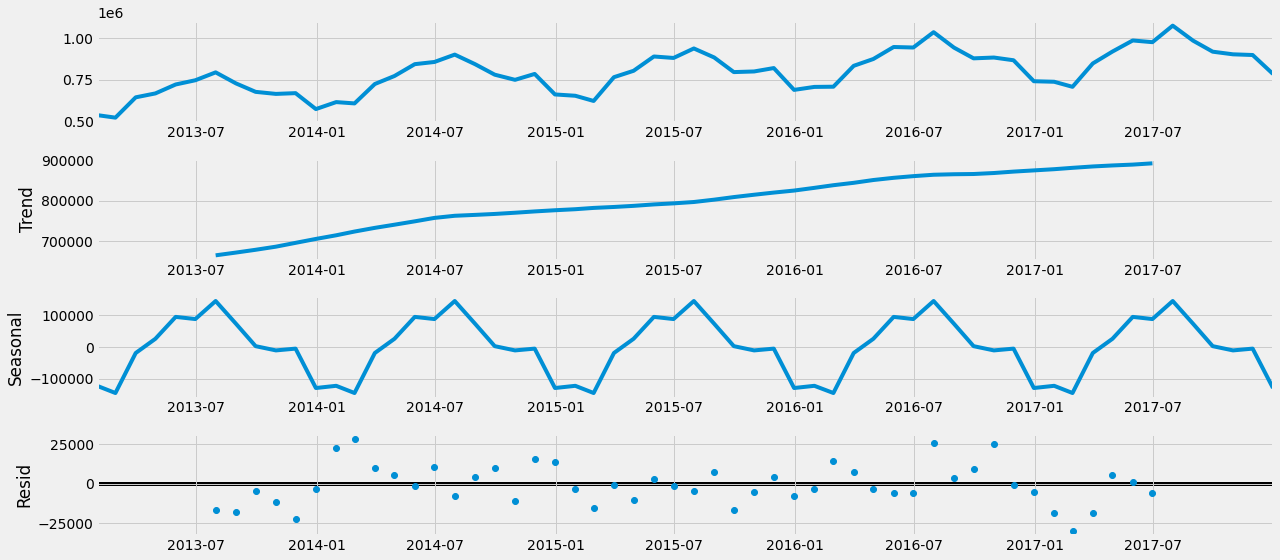

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(mdf, model='additive')
fig = decomposition.plot()
plt.show()

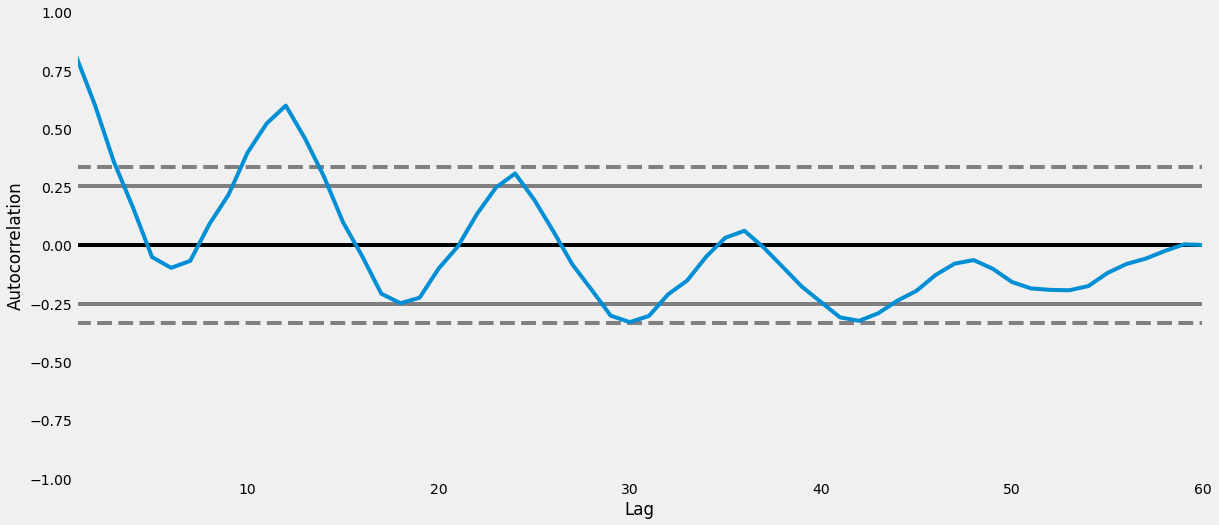

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(mdf['Sales'])
plt.show()

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 10.6 MB/s 
     |████████████████████████████████| 9.9 MB 36.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit=auto_arima(mdf['Sales'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1484.879, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1486.828, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1486.903, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1483.110, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.596 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -740.555
Date:                Mon, 14 Nov 2022   AIC                           1483.110
Time:                        19:05:35   BIC                           1485.187
Sample:                    01-31-2013   HQIC                          1483.921
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.597e+09   9.77e+08      4.707      0.000    2.68e+09    6.51e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.53   Prob(JB):                         0.69
Heteroskedasticity (H):               1.55   Skew:                            -0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(mdf.shape)
size = int(len(mdf) * 0.80)
train, test= mdf[0:size], mdf[size:len(mdf)]
print(train.shape,test.shape)

(60, 1)
(48, 1) (12, 1)


In [ ]:
model = ARIMA(mdf, order=(0,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -740.555
Date:                Mon, 14 Nov 2022   AIC                           1483.110
Time:                        19:05:35   BIC                           1485.187
Sample:                    01-31-2013   HQIC                          1483.921
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.597e+09   9.77e+08      4.707      0.000    2.68e+09    6.51e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.53   Prob(JB):                         0.69
Heteroskedasticity (H):               1.55   Skew:                            -0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Residual Error')

<Figure size 1440x576 with 0 Axes>

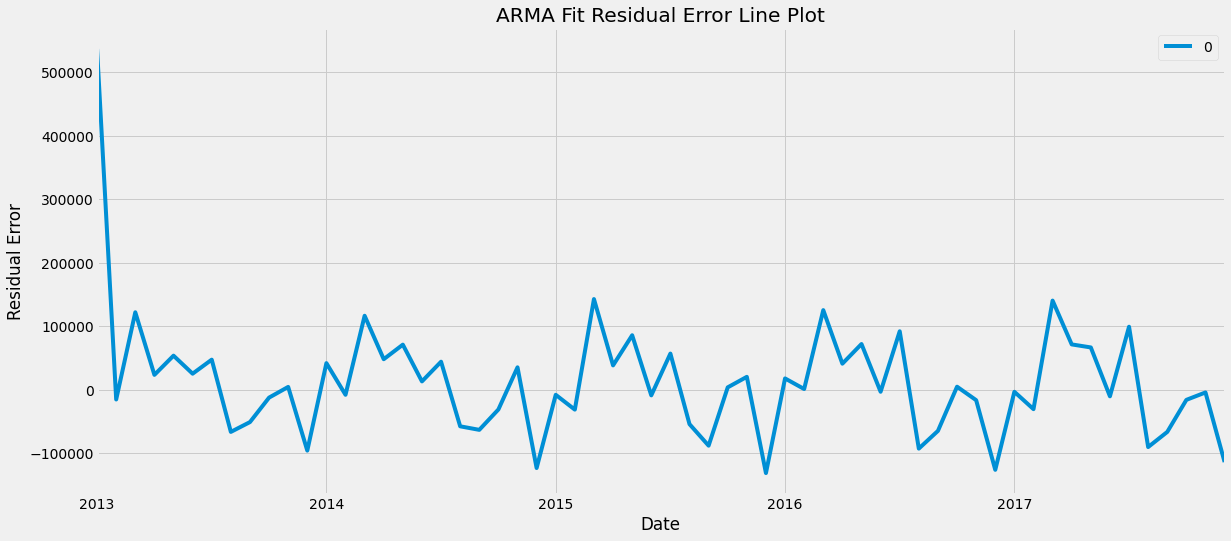

In [ ]:
# plot residual errors
plt.figure(figsize=(20,8))
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.xlabel('Date')
plt.ylabel('Residual Error')

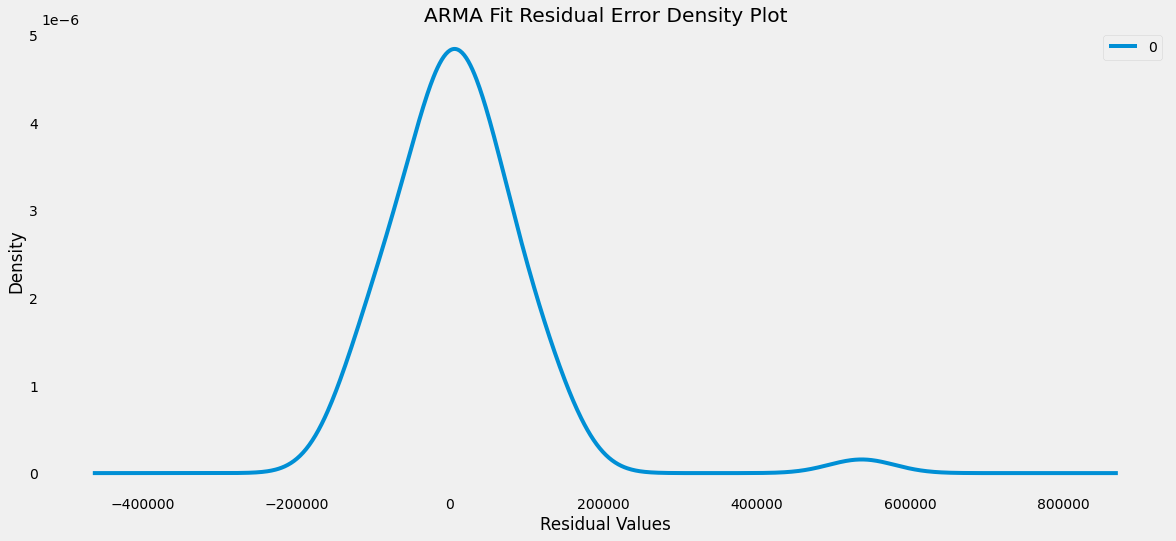

                   0
count      60.000000
mean    13071.983333
std     96885.931494
min   -131208.000000
25%    -36152.250000
50%      2522.000000
75%     49560.750000
max    536883.000000


In [ ]:
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.xlabel('Residual Values')
plt.grid()
plt.show()
print(residuals.describe())

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#print(pred)
prediction=list(pred)

In [ ]:
print(prediction)

[740520.0, 737385.0, 706905.0, 847415.0, 918907.0, 985624.0, 975327.0, 1074713.0, 984531.0, 918170.0, 902307.0, 898137.0]


In [ ]:
raw_values=mdf.values

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

Test RMSE: 74155.200


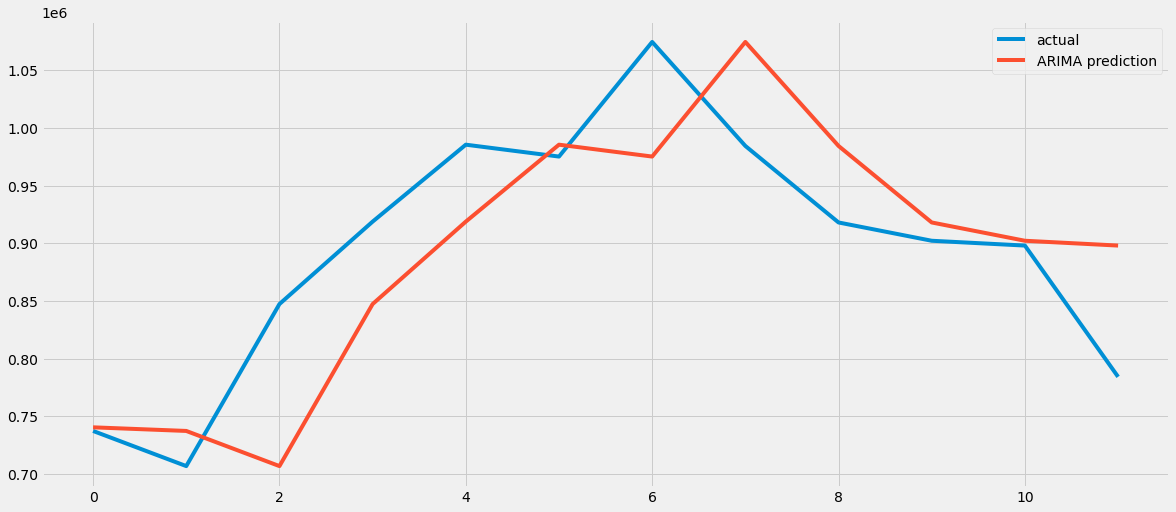

In [ ]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], prediction))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:], label="actual")
pyplot.plot(prediction, label="ARIMA prediction")
pyplot.legend(loc="upper right")
pyplot.show()

In [ ]:
stepwise_fit1=auto_arima(mdf['Sales'],m=12,trace=True,seasonal=True,suppress_warnings=True,stepwise=True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1071.727, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1069.812, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1069.386, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1072.166, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.759, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1069.885, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1070.711, Time=1.39 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1070.714, Time=0.97 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1069.871, Time=0.36 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1070.254, Time=0.29 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1072.531, Time=1.24 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1067.279, Time=0.85 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1081.868, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -530.639
Date:                              Mon, 14 Nov 2022   AIC                           1067.279
Time:                                      19:05:50   BIC                           1072.829
Sample:                                  01-31-2013   HQIC                          1069.367
                                       - 12-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6616      1.162     -0.569      0.569      -2.939       1.615
ma.S.L12       0.7110      1.124      0.633      0.527      -1.492       2.914
sigma2      3.802e+08    1.9e-09      2e+17      0.000     3.8e+08     3.8e+08
===================================================================================
Ljung-Box (L1) (Q):                   9.03   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               1.00   Skew:                             0.10
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.69e+33. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model1 = SARIMAX(mdf, order=(0,1,0),seasonal_order=(1,1,1,12))
model_fit1 = model1.fit()
model_fit1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -530.639
Date:                              Mon, 14 Nov 2022   AIC                           1067.279
Time:                                      19:31:08   BIC                           1072.829
Sample:                                  01-31-2013   HQIC                          1069.367
                                       - 12-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6616      1.162     -0.569      0.569      -2.939       1.615
ma.S.L12       0.7110      1.124      0.633      0.527      -1.492       2.914
sigma2      3.802e+08    1.9e-09      2e+17      0.000     3.8e+08     3.8e+08
===================================================================================
Ljung-Box (L1) (Q):                   9.03   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               1.00   Skew:                             0.10
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.69e+33. Standard errors may be unstable.
"""

<Figure size 1440x576 with 0 Axes>

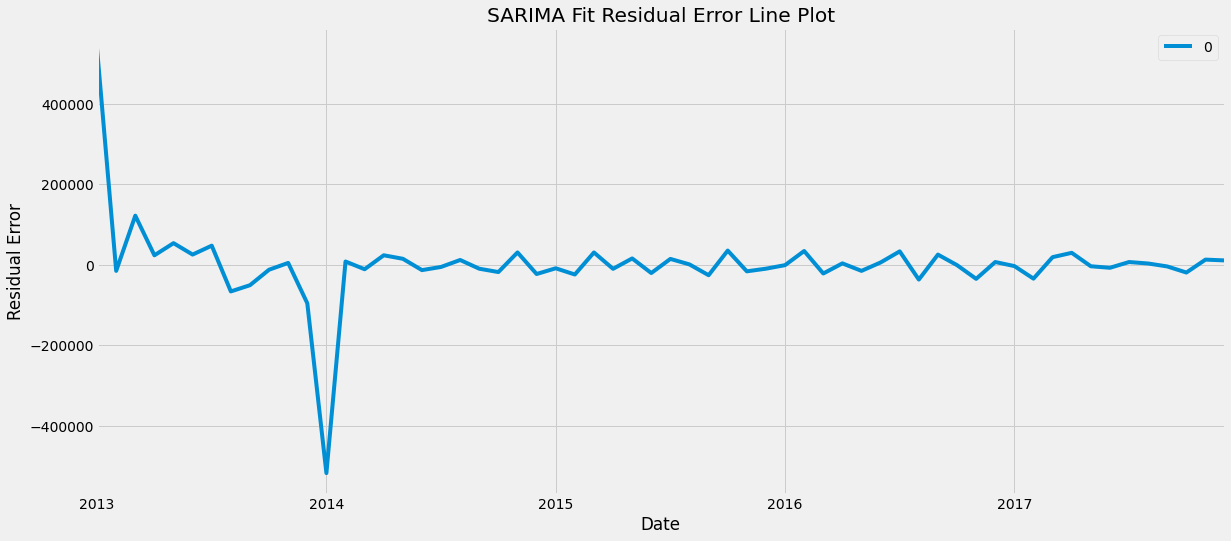

In [ ]:
# plot residual errors
plt.figure(figsize=(20,8))
residuals1 = pd.DataFrame(model_fit1.resid)
residuals1.plot()
plt.title('SARIMA Fit Residual Error Line Plot')
plt.xlabel('Date')
plt.ylabel('Residual Error')
plt.show()

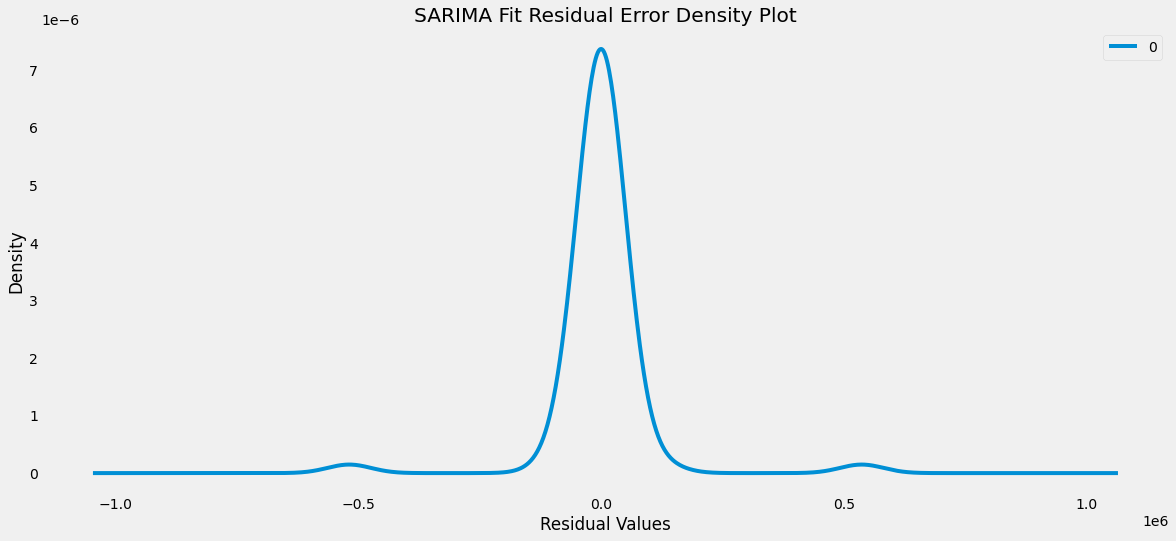

                   0
count      60.000000
mean      860.364786
std    101868.317926
min   -518277.224959
25%    -15513.117445
50%      -986.806770
75%     16541.562662
max    536883.000000


In [ ]:
residuals1.plot(kind='kde')
plt.title('SARIMA Fit Residual Error Density Plot')
plt.xlabel('Residual Values')
plt.grid()
plt.show()
print(residuals1.describe())

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred1=model_fit1.predict(start=start,end=end,typ='levels').rename('SARIMA predictions')
print(pred)
prediction1=list(pred1)

Date
2017-01-31     740520.0
2017-02-28     737385.0
2017-03-31     706905.0
2017-04-30     847415.0
2017-05-31     918907.0
2017-06-30     985624.0
2017-07-31     975327.0
2017-08-31    1074713.0
2017-09-30     984531.0
2017-10-31     918170.0
2017-11-30     902307.0
2017-12-31     898137.0
Freq: M, Name: ARIMA predictions, dtype: float64


Test RMSE: 16436.714


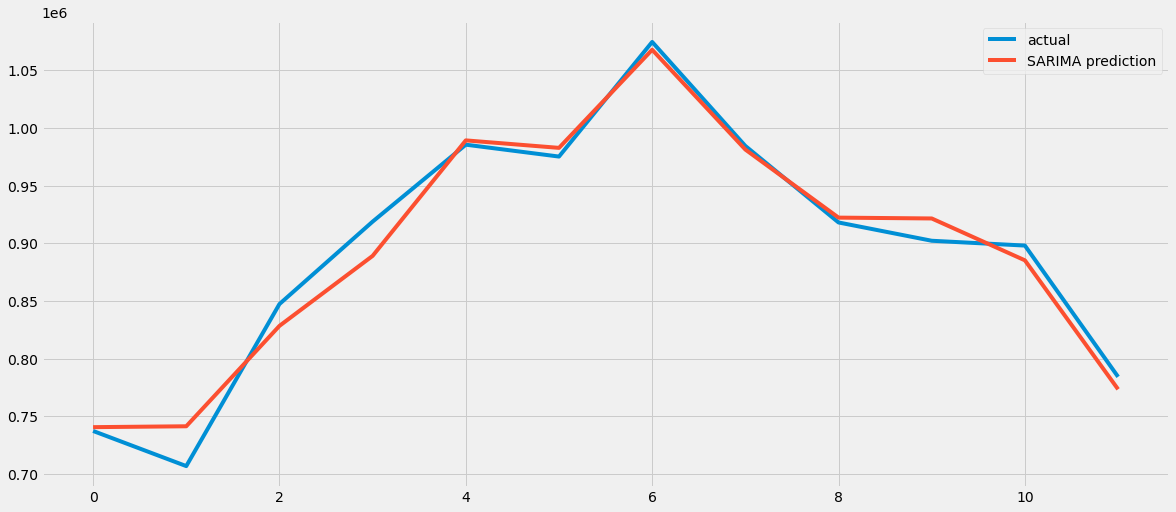

In [ ]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], prediction1))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:], label="actual")
pyplot.plot(prediction1, label="SARIMA prediction")
pyplot.legend(loc="upper right")
pyplot.show()

In [ ]:
model2 = sm.tsa.statespace.SARIMAX(mdf.Sales,order=(0,1,0),seasonal_order=(1,1,1,12), enforce_invertibility=False, enforce_stationarity=False)
model_fit2 = model2.fit()
model_fit2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -494.204
Date:                              Mon, 14 Nov 2022   AIC                            994.409
Time:                                      19:27:55   BIC                            998.988
Sample:                                  01-31-2013   HQIC                           995.971
                                       - 12-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2352   2.76e-23  -8.51e+21      0.000      -0.235      -0.235
ma.S.L12    5.136e+11         -0       -inf      0.000    5.14e+11    5.14e+11
sigma2      2.544e-12   3.26e-10      0.008      0.994   -6.36e-10    6.41e-10
===================================================================================
Ljung-Box (L1) (Q):                   5.07   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.02   Prob(JB):                         0.74
Heteroskedasticity (H):               0.68   Skew:                            -0.16
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

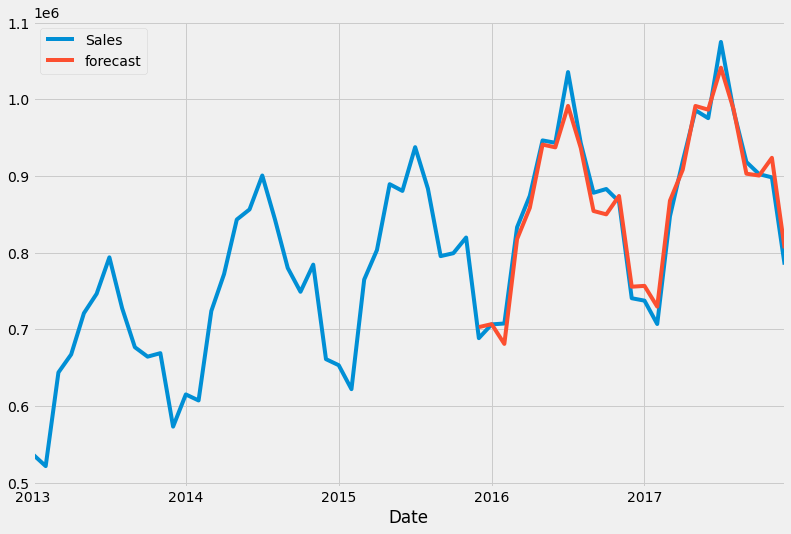

In [ ]:
mdf['forecast']=model_fit2.predict(start=35,end=60,dynamic=True)
mdf[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
futuredates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [ ]:
futuredatedf=pd.DataFrame(index=futuredates[1:], columns=mdf.columns)

In [ ]:
futuredatedf.tail()

,Sales
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN
2019-11-30,NaN


In [ ]:
future=pd.concat([mdf,futuredatedf])

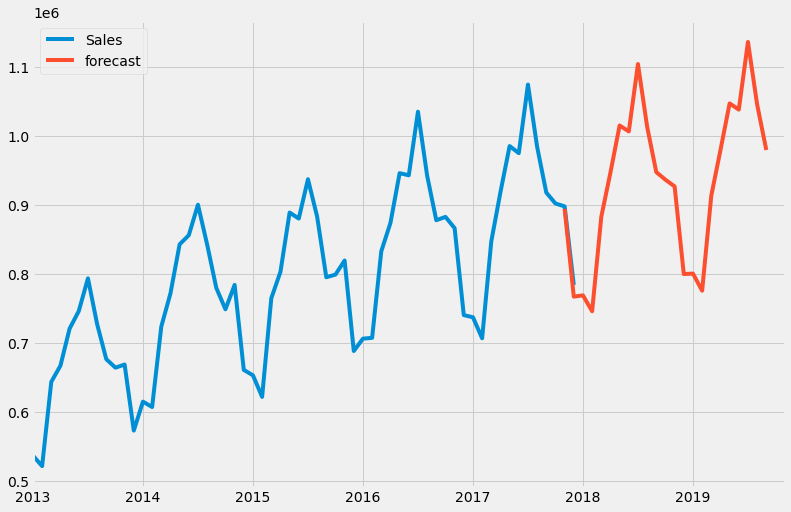

In [ ]:
future['forecast']=model_fit2.predict(start=58,end=80,dynamic=True)
future[['Sales','forecast']].plot(figsize=(12,8))